### Historical Shape Indicator (HSI),  Adviser Survey Results

These are results from the Adviser Survey Workbook.     
These trades were generated by a combination of both  
Historical Shape Indicator and Logistic Regression Classifier.  
Approximately 81 stocks are studied over a two year span.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Import Processed Data

In [2]:
df_srv = pd.read_csv('adviser_survey_102919.csv')
df_srv = df_srv.dropna()
df_srv.head()

,symbol,equity,test_year,price,lowT,highT,trades,in_days,t-val,p-val,exp_ret,volatility,years,sharpe,beat
0,ENTG,ENTEGRIS INC,2017,30.315661,0.35625,0.7000,8,188,-0.715667,0.475543,71.252650,0.189958,0.986301,3.618814,58.534916
1,ENTG,ENTEGRIS INC,2018,27.665078,0.31250,0.7250,4,187,1.502347,0.135510,-1.254614,0.236548,0.994521,-0.201292,-5.167195
2,ENTG,ENTEGRIS INC,2019,48.442500,0.29375,0.7250,6,126,1.499221,0.135945,67.910416,0.185745,0.791781,4.429156,44.592937
3,JBSS,SANFILIPPO JOHN B&SON,2017,59.578032,0.28750,0.6375,5,141,0.657639,0.511526,7.095994,0.140648,0.986301,0.262680,-0.664858
4,JBSS,SANFILIPPO JOHN B&SON,2018,53.946187,0.45625,0.6500,5,157,2.179768,0.030543,13.416253,0.207075,0.994521,0.482443,9.462504


In [3]:
df_srv['sharpe'] = df_srv['sharpe'].astype(float)
df_srv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 275
Data columns (total 15 columns):
symbol        276 non-null object
equity        276 non-null object
test_year     276 non-null int64
price         276 non-null float64
lowT          276 non-null float64
highT         276 non-null float64
trades        276 non-null int64
in_days       276 non-null int64
t-val         276 non-null float64
p-val         276 non-null float64
exp_ret       276 non-null float64
volatility    276 non-null float64
years         276 non-null float64
sharpe        276 non-null float64
beat          276 non-null float64
dtypes: float64(10), int64(3), object(2)
memory usage: 34.5+ KB


### Survey Analysis

In [5]:
# stock tickers
tickers = df_srv['symbol'].unique().tolist()
tickers.sort()
print(tickers)

['ACGL', 'ADI', 'AIN', 'ALG', 'APO', 'AQN', 'AUDC', 'AWK', 'AWR', 'BRC', 'CBOE', 'CBU', 'CCMP', 'CF', 'CHD', 'CHEF', 'CIGI', 'CNS', 'CSCO', 'CSL', 'CW', 'CWCO', 'CWT', 'DHI', 'DRI', 'EME', 'ENTG', 'ESE', 'ETN', 'FAF', 'FCFS', 'FFIN', 'FMC', 'FNF', 'FSS', 'GIB', 'GNTX', 'GRMN', 'GWR', 'HEI-A', 'IDA', 'JBSS', 'KSU', 'LDOS', 'LNT', 'MDC', 'MDT', 'MRK', 'MSFT', 'MTH', 'NBHC', 'NDAQ', 'NVS', 'OKE', 'PCAR', 'PEP', 'PGR', 'PHM', 'PRFT', 'ROST', 'RPM', 'RSG', 'SAFT', 'SAIA', 'SCL', 'SNPS', 'SPNS', 'SPXC', 'TER', 'TGT', 'TMHC', 'TMUS', 'TREX', 'TTC', 'TTEK', 'TXN', 'UPS', 'WCN', 'WM', 'WRB', 'WST']


In [6]:
# company names 
equities = df_srv['equity'].unique().tolist()
equities.sort()
print(equities)

['ALAMO GROUP INC', 'ALBANY INTL CORP', 'ALGONQUIN POWER & UTIL CORP', 'ALLIANT ENERGY CORP', 'AMERICAN STATES WATER CO', 'AMERICAN WATER WORKS CO INC', 'ANALOG DEVICES', 'APOLLO GLOBAL MGMT INC', 'ARCH CAPITAL GROUP LTD', 'AUDIOCODES LTD', 'BERKLEY (W R) CORP', 'BRADY CORP', 'CABOT MICROELECTRONICS CORP', 'CALIFORNIA WATER SERVICE GP', 'CARLISLE COS INC', 'CBOE GLOBAL MARKETS INC', 'CF INDUSTRIES HOLDINGS INC', 'CGI INC', "CHEFS' WAREHOUSE INC", 'CHURCH & DWIGHT INC', 'CISCO SYSTEMS INC', 'COHEN & STEERS INC', 'COLLIERS INTL GROUP INC', 'COMMUNITY BANK SYSTEM INC', 'CONSOLIDATED WATER CO INC', 'CURTISS-WRIGHT CORP', 'D R HORTON INC', 'DARDEN RESTAURANTS INC', 'EATON CORP PLC', 'EMCOR GROUP INC', 'ENTEGRIS INC', 'ESCO TECHNOLOGIES INC', 'FEDERAL SIGNAL CORP', 'FIDELITY NATL FINL FNF GROUP', 'FIRST AMERICAN FINANCIAL CP', 'FIRST FINL BANKSHARES INC', 'FIRSTCASH INC', 'FMC CORP', 'GARMIN LTD', 'GENESEE & WYOMING INC', 'GENTEX CORP', 'HEICO CORP', 'IDACORP INC', 'KANSAS CITY SOUTHERN', 'L

In [7]:
len(equities)

81

#### Test Years

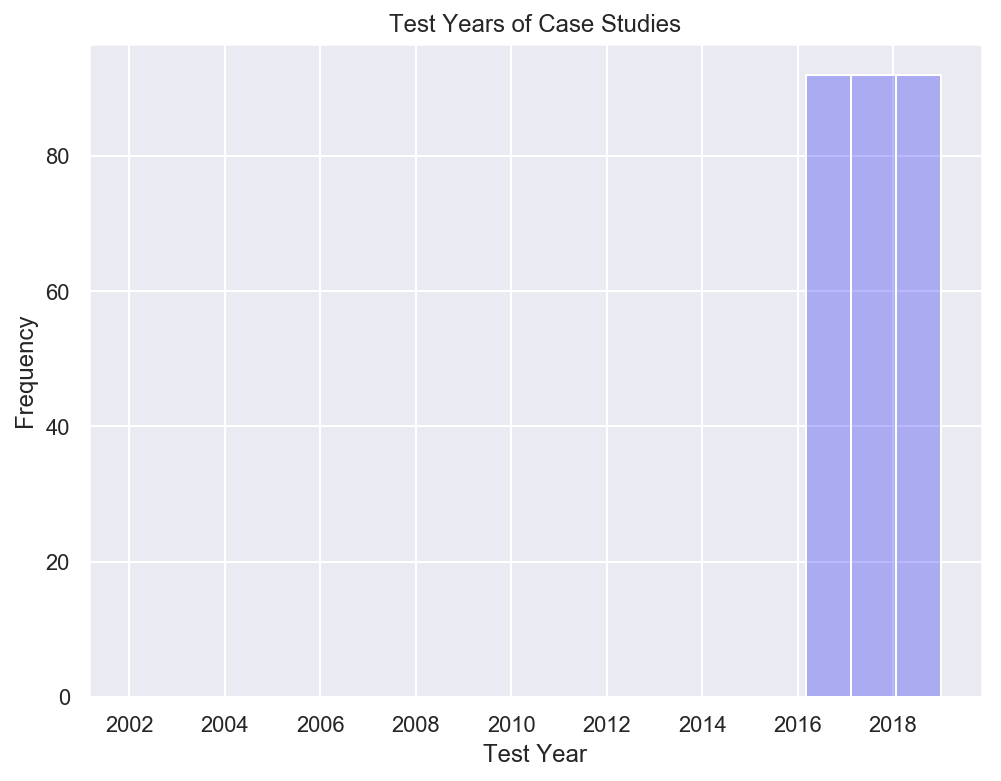

In [8]:
# test year histogram
years = df_srv['test_year']
plt.figure(figsize=(8,6))
plt.xlabel("Test Year")
plt.ylabel("Frequency")
plt.title("Test Years of Case Studies")
plt.xticks(np.arange(2002, 2020, step=2))
plt.hist(years,18,(2002,2019), color = (.1,.1,.95,.3));

#### Stock Nominal Year Price Histogram

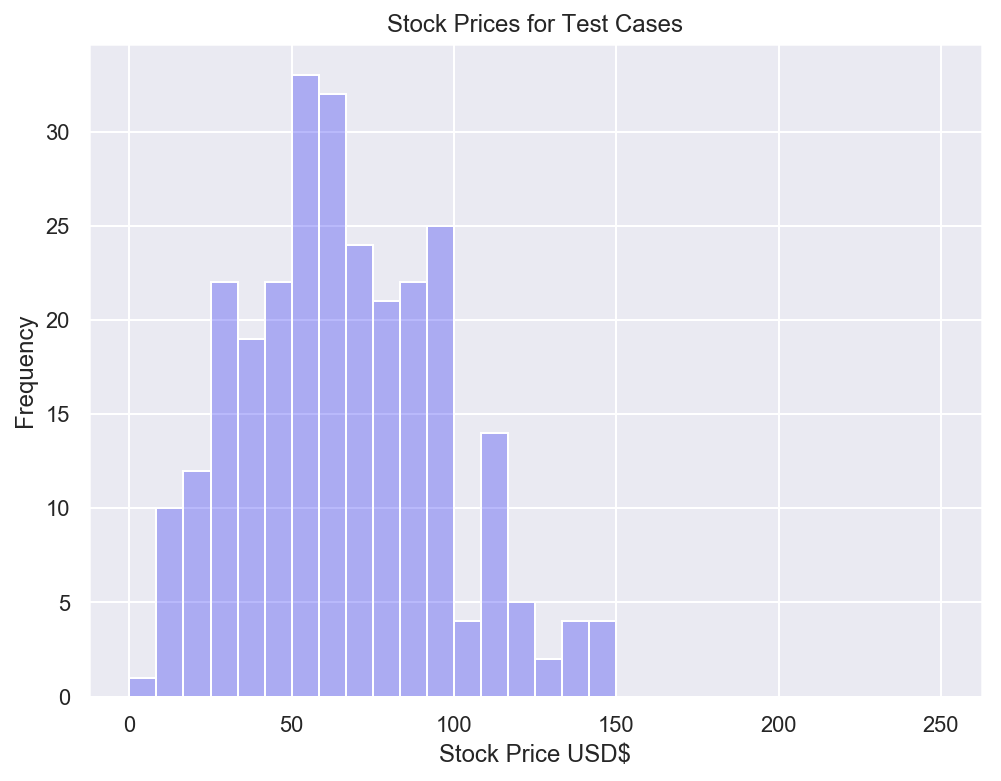

In [9]:
# stock price histogram
prices = df_srv['price']
plt.figure(figsize=(8,6))
plt.xlabel("Stock Price USD$")
plt.ylabel("Frequency")
plt.title("Stock Prices for Test Cases")
plt.hist(prices.dropna(),30,(0,250), color = (.1,.1,.95,.3));

Small portfolios necessarily need small stock prices.  
This is to manage the risk of ruin.  

In [10]:
# price statistics
prices.describe()

count    276.000000
mean      65.921640
std       30.584563
min        6.884752
25%       42.286952
50%       62.852717
75%       87.362931
max      145.745000
Name: price, dtype: float64

#### Indicator Threshold Values

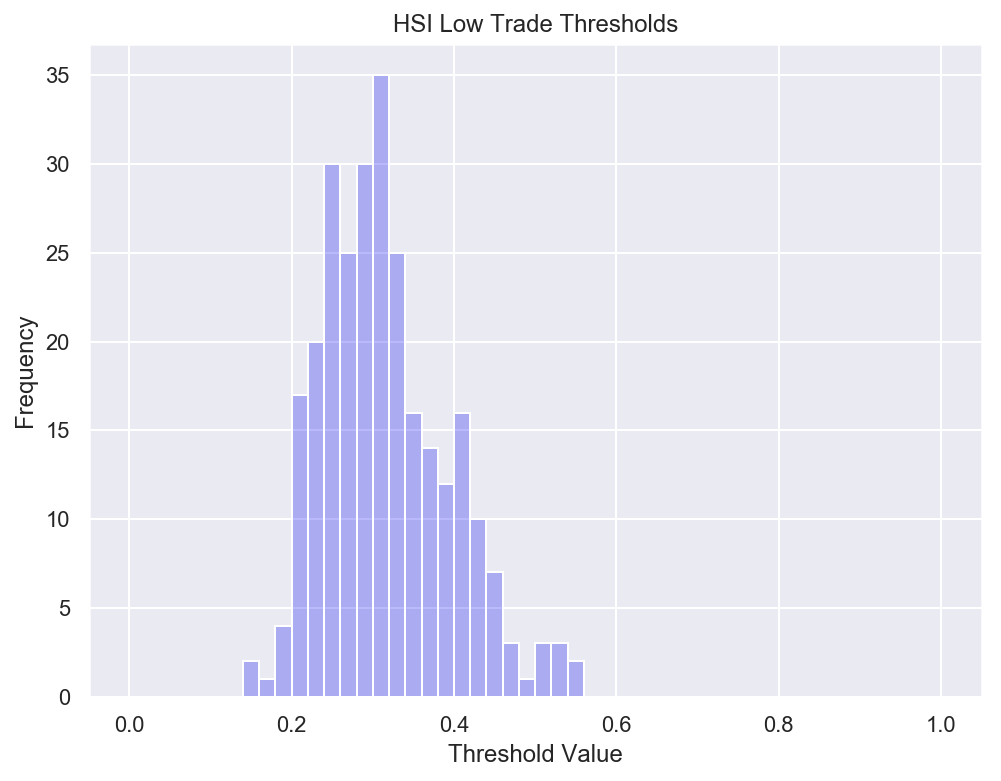

In [11]:
# low threshold histogram
lowTs = df_srv['lowT']
plt.figure(figsize=(8,6))
plt.xlabel("Threshold Value")
plt.ylabel("Frequency")
plt.title("HSI Low Trade Thresholds")
plt.hist(lowTs.dropna(),50,(0,1), color = (.1,.1,.95,.3));

This graphis shows that one size does not fit all.
The optimized tuning varies with the Test case.

In [12]:
lowTs.describe()

count    276.000000
mean       0.314538
std        0.078428
min        0.143750
25%        0.256250
50%        0.300000
75%        0.364062
max        0.550000
Name: lowT, dtype: float64

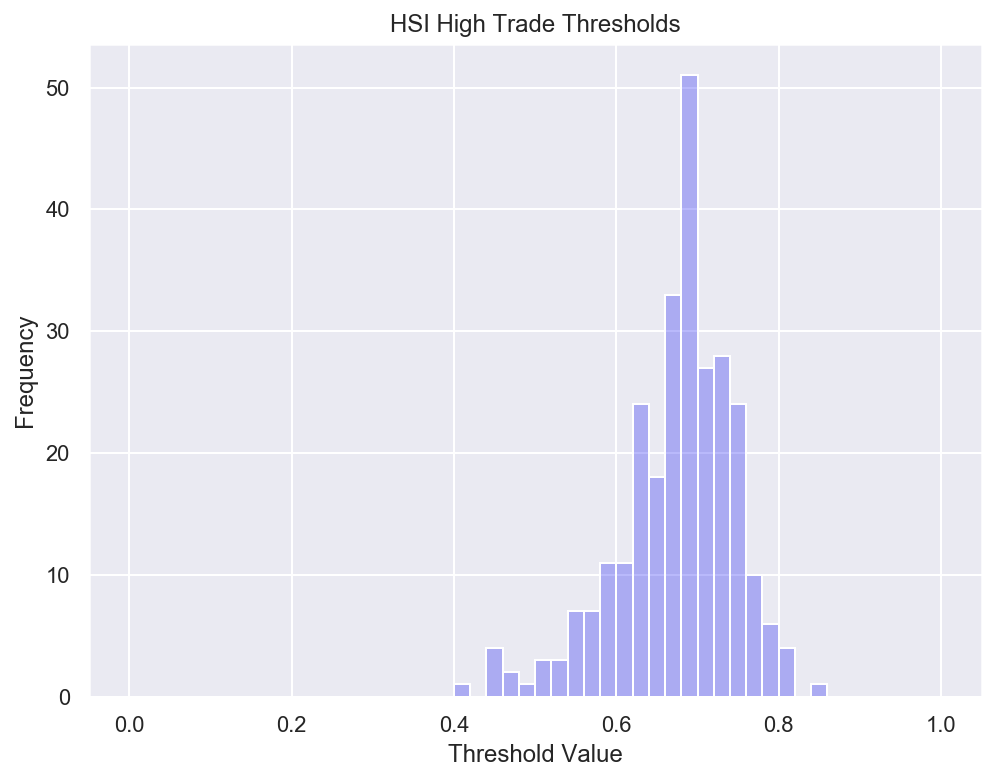

In [13]:
# High threshold histogram
highTs = df_srv['highT']
plt.figure(figsize=(8,6))
plt.xlabel("Threshold Value")
plt.ylabel("Frequency")
plt.title("HSI High Trade Thresholds")
plt.hist(highTs.dropna(),50,(0,1), color = (.1,.1,.95,.3));

The high threshold seems to mirror image of the low threshold.

In [14]:
highTs.describe()

count    276.000000
mean       0.674298
std        0.072451
min        0.418750
25%        0.637500
50%        0.681250
75%        0.725000
max        0.843750
Name: highT, dtype: float64

#### Number of Trades in Test Year

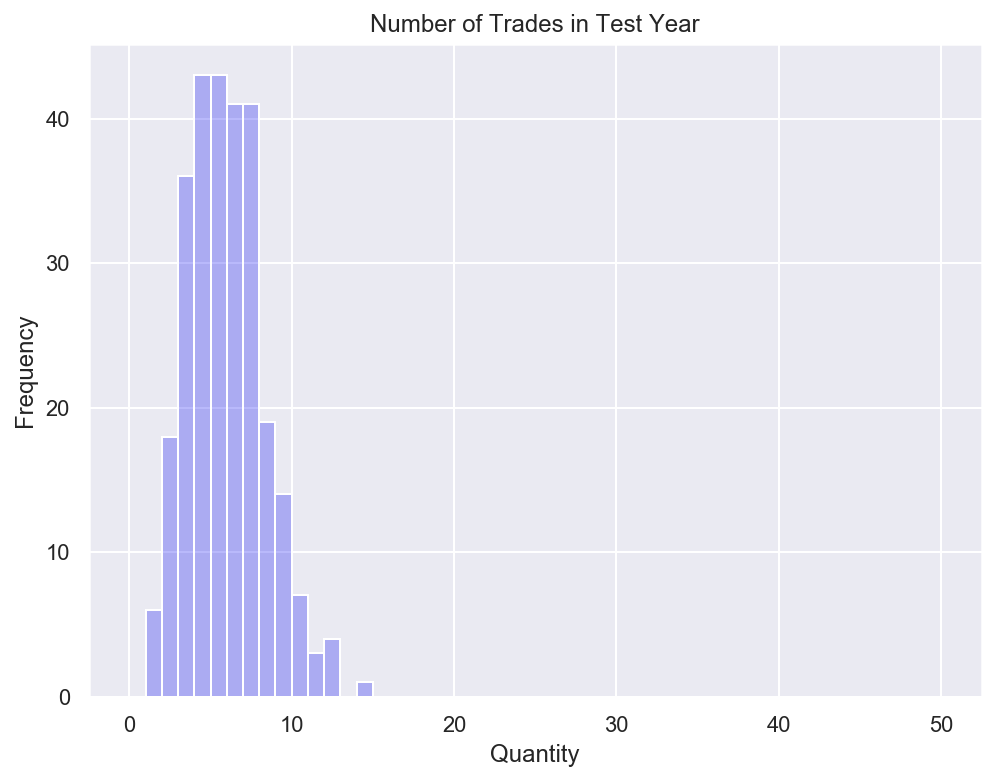

In [15]:
# High threshold histogram
num_trades = df_srv['trades']
plt.figure(figsize=(8,6))
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Number of Trades in Test Year")
plt.hist(num_trades.dropna(),50,(0,50), color = (.1,.1,.95,.3));

This project is not intended for day trading.  
The number of trades are typically one every two months in any one market.

In [16]:
# trade count statistics
num_trades.describe()

count    276.000000
mean       5.481884
std        2.367131
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       14.000000
Name: trades, dtype: float64

#### In The Market Trade Days

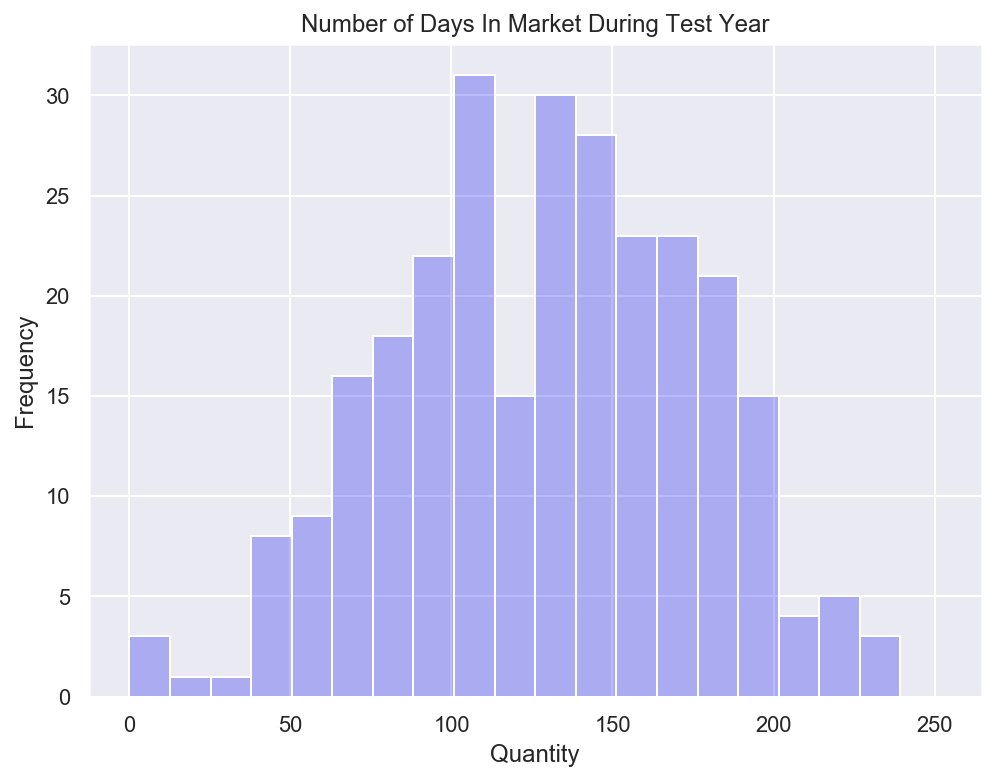

In [59]:
# Number of days in the market histogram
in_days = df_srv['in_days']
plt.figure(figsize=(8,6))
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Number of Days In Market During Test Year")
plt.hist(in_days.dropna(),20,(0,252), color = (.1,.1,.95,.3));

The long trading style is a "buy and hold" strategy.  
A day trader might push up against the high quantity  side.  

In [18]:
in_days.describe()

count    276.000000
mean     129.090580
std       46.539943
min        4.000000
25%       94.000000
50%      131.000000
75%      164.250000
max      235.000000
Name: in_days, dtype: float64

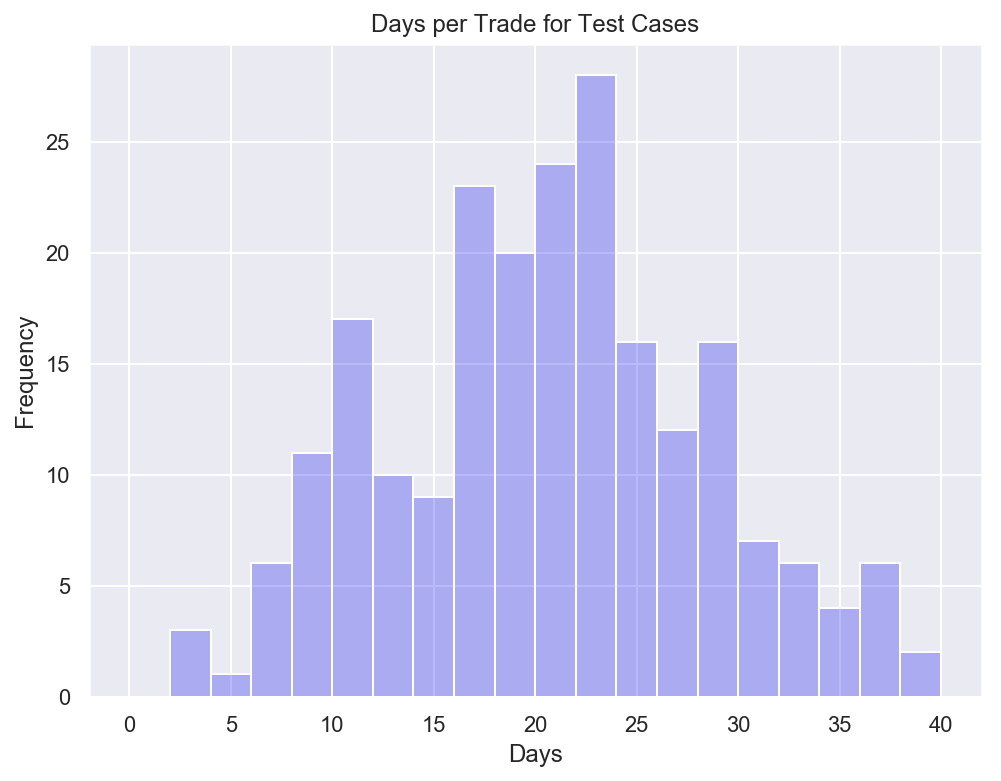

In [60]:
# Days per Trade histogram
days_per_trade = df_srv['in_days']/df_srv['trades']
plt.figure(figsize=(8,6))
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title("Days per Trade for Test Cases")
plt.hist(days_per_trade.dropna(),20,(0,40), color = (.1,.1,.95,.3));

The trade duration supports the idea of a couple trades per month.

In [61]:
days_per_trade.describe()

count    276.000000
mean      29.915818
std       23.583735
min        2.000000
25%       17.083333
50%       23.142857
75%       32.625000
max      158.000000
dtype: float64

#### T-Test Results
These are the results of the Equal Sample Unequal Variance Two-Tail Test.  
In this case the null hypothessi relates to no difference between returns,  
in the market using the trade rules, and out of the market using trade rules.  
The test samples for minimum counts between the two, then samples the larger  
case for equal samples.

In the case where no significance is found, the indicator plays less of a factor.  
In the case where the p-value is small, the indicator plays a greater role.  

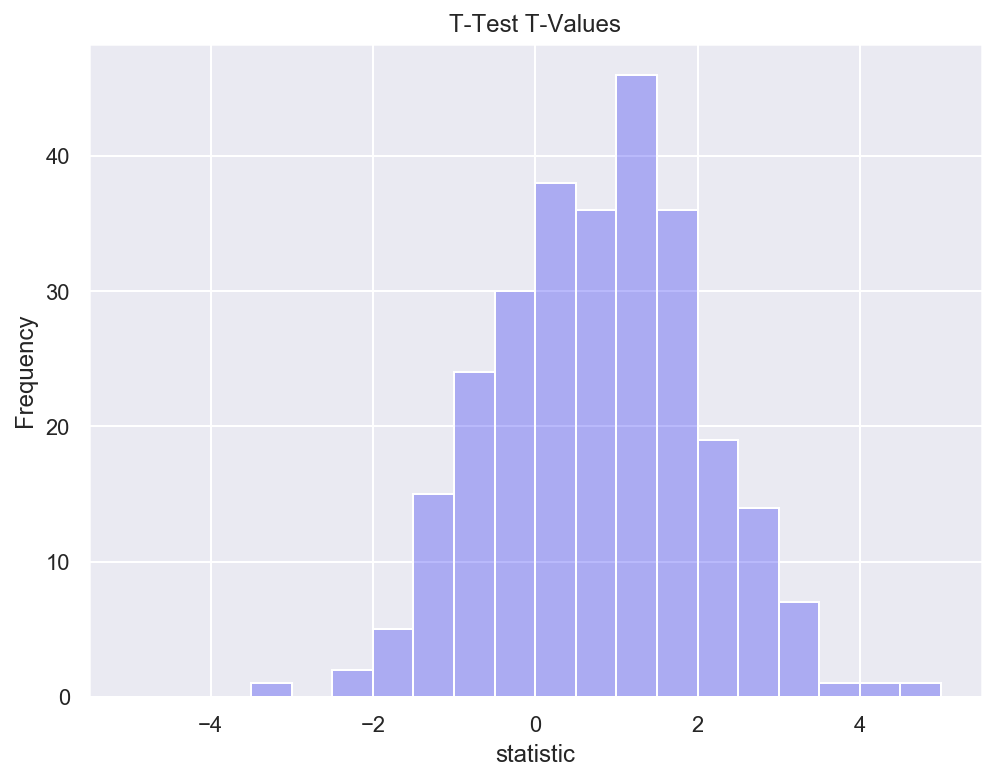

In [62]:
# T Values histogram
t_vals = df_srv['t-val']
plt.figure(figsize=(8,6))
plt.xlabel("statistic")
plt.ylabel("Frequency")
plt.title("T-Test T-Values")
plt.hist(t_vals.dropna(),20,(-5,5), color = (.1,.1,.95,.3));

In [63]:
t_vals.describe()

count    276.000000
mean       0.790640
std        1.268002
min       -3.151524
25%       -0.124461
50%        0.869518
75%        1.645266
max        4.624528
Name: t-val, dtype: float64

The t-values measure size of the difference relative to variation in the data.  
As t increases, the null hypothesis becomes less likely.  
That these are peaking off zero, supports some value added by the indicator.  

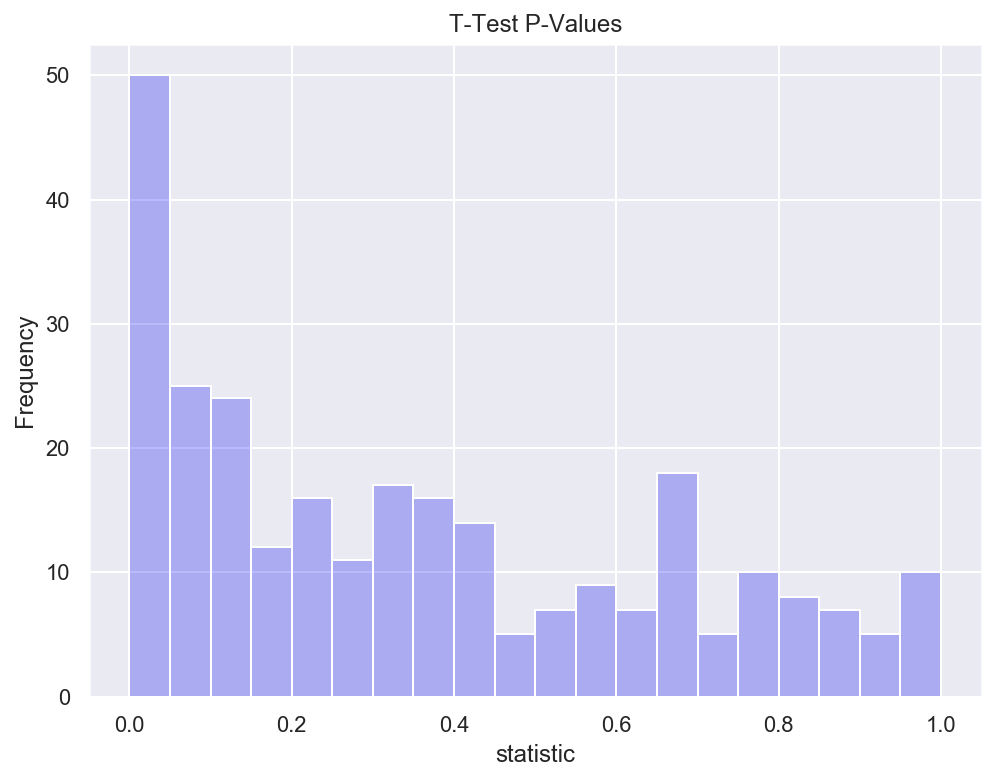

In [64]:
# P Values histogram
p_vals = df_srv['p-val']
plt.figure(figsize=(8,6))
plt.xlabel("statistic")
plt.ylabel("Frequency")
plt.title("T-Test P-Values")
plt.hist(p_vals.dropna(),20,(0,1), color = (.1,.1,.95,.3));

In [65]:
p_vals.describe()

count    276.000000
mean       0.356299
std        0.297952
min        0.000007
25%        0.083794
50%        0.302235
75%        0.615827
max        0.997650
Name: p-val, dtype: float64

The statistics indicate that the lower quartile is coming in at 0.065;  
this suggests something significant going on with ~1/4 of the group.  

Unfortunately, with an average days in the market of 135,   
that's also the number of samples per t-test here.  
Such a low number of samples may not be sufficient for detecting  
return differences of interest.

In any case, as the p-value drops might suggest episodes where  
in the market trades gave greater return than not; it's not entirely futile.

#### Expected Returns  
The log returns are converted to simple percentages.  
In most cases, the test case spans one year.  
Since 2019 is partial, the returns for those are lower.

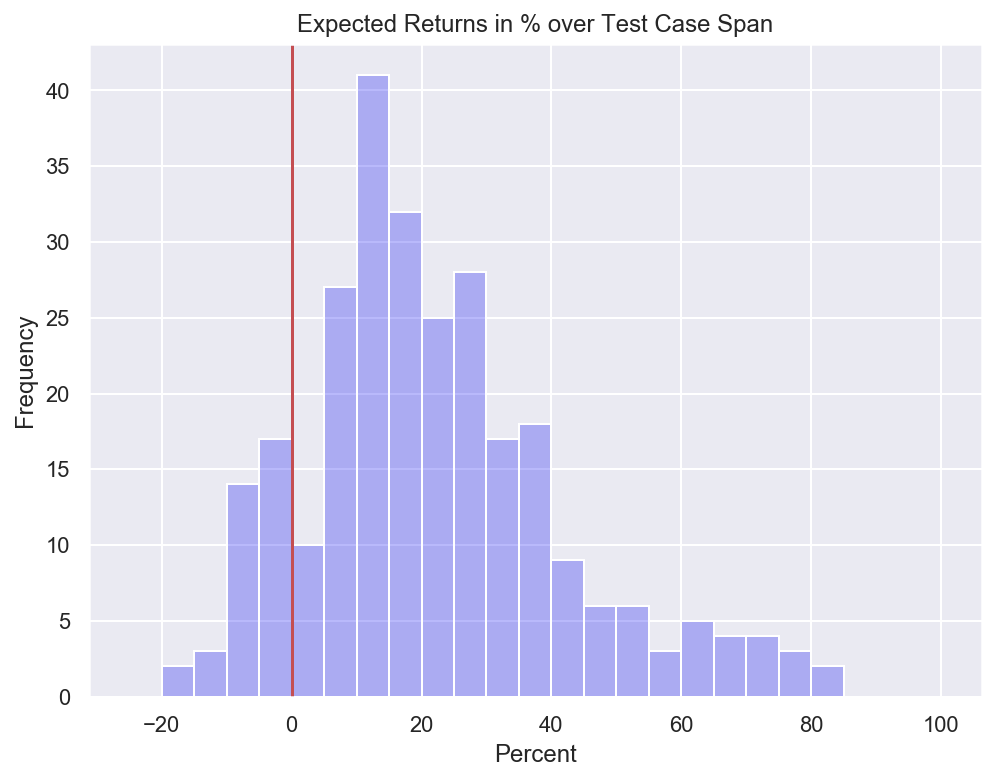

In [51]:
# P Values histogram
exp_rets = df_srv[df_srv['exp_ret']<125]['exp_ret']
plt.figure(figsize=(8,6))
plt.axvline(x=0., color = 'r')
plt.xlabel("Percent")
plt.ylabel("Frequency")
plt.title("Expected Returns in % over Test Case Span")
plt.hist(exp_rets.dropna(),25,(-25,100), color = (.1,.1,.95,.3));

In [27]:
exp_rets.describe()

count    276.000000
mean      21.907866
std       20.036162
min      -17.146435
25%        9.201564
50%       18.831166
75%       32.622876
max       80.029451
Name: exp_ret, dtype: float64

In the big picture, a practical approach to stock trading seems this:  
win more times than you lose, "cut your losses and let your winners run."

The expected returns histogram here supports this idea.

#### Trade Volatility

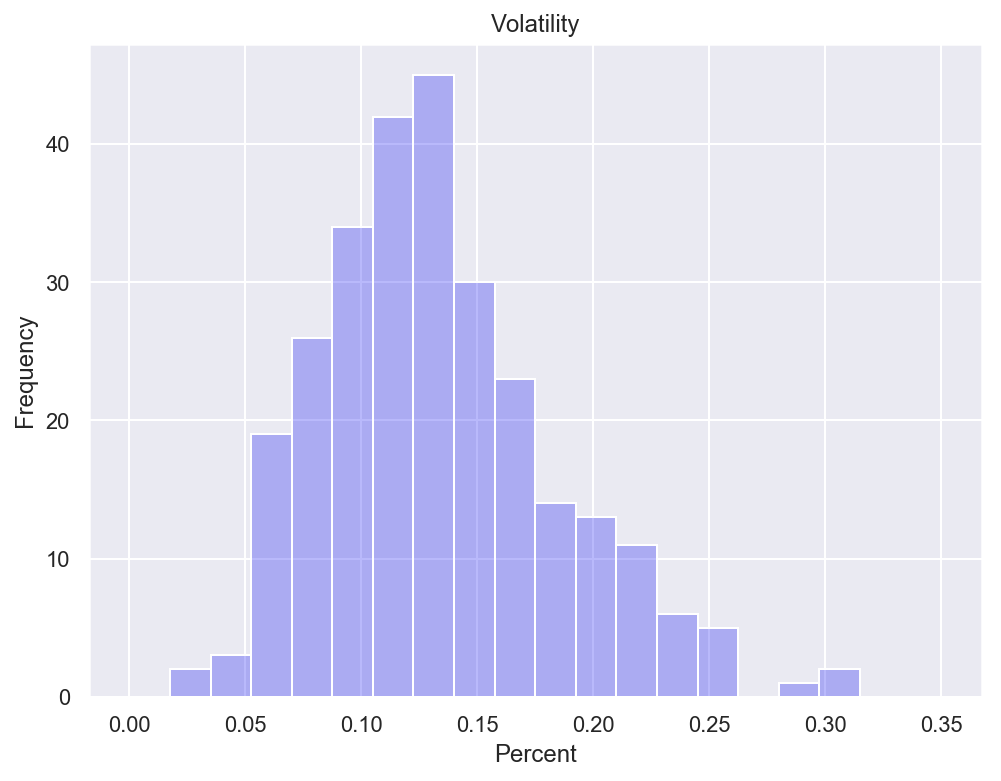

In [52]:
# P Values histogram
exp_rets = df_srv[df_srv['volatility']<1]['volatility']
plt.figure(figsize=(8,6))
plt.xlabel("Percent")
plt.ylabel("Frequency")
plt.title("Volatility")
plt.hist(exp_rets.dropna(),20,(0,.35), color = (.1,.1,.95,.3));

In [48]:
df_srv[df_srv['volatility']<1]['volatility'].describe()

count    276.000000
mean       0.133400
std        0.051229
min        0.017516
25%        0.097637
50%        0.128674
75%        0.159298
max        0.311897
Name: volatility, dtype: float64

#### Sharpe Ratio
This reveals degrees of health in the trades,   
higher as better and too high as suspicious.

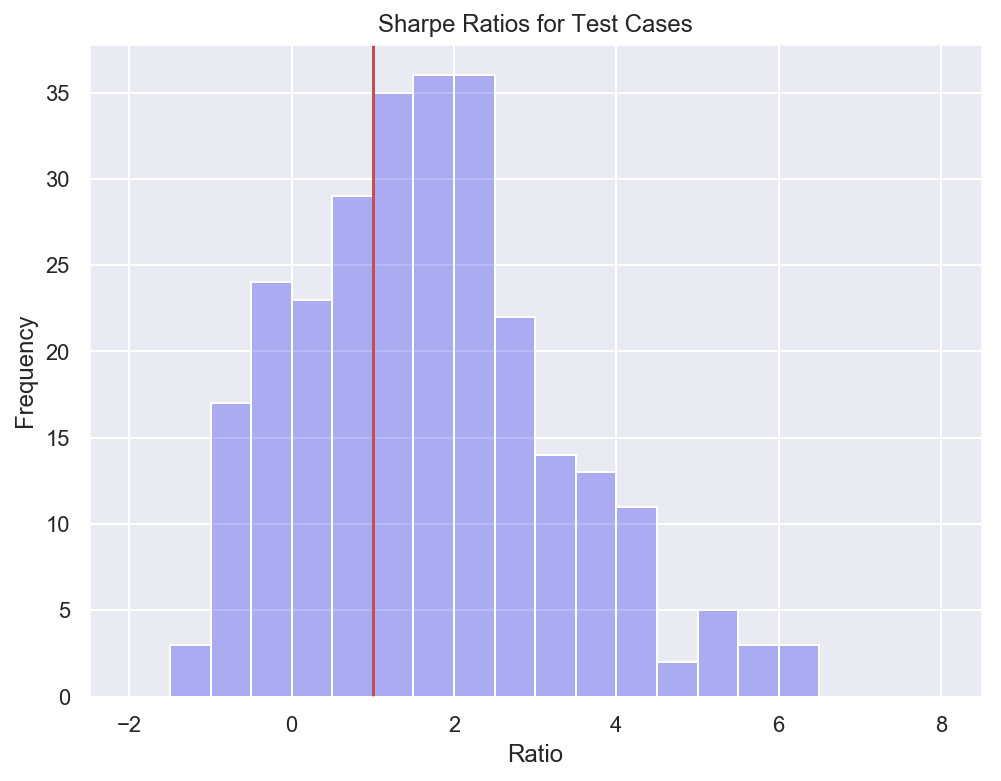

In [58]:
# Sharpe ratio histogram
sharpes = df_srv[df_srv['sharpe']<10]['sharpe']
plt.figure(figsize=(8,6))
plt.axvline(x=1.,color='r')
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.title("Sharpe Ratios for Test Cases")
plt.hist(sharpes.dropna(),20,(-2,8), color = (.1,.1,.95,.3));

In [55]:
sharpes.describe()

count    276.000000
mean       1.692387
std        1.581311
min       -1.167892
25%        0.522018
50%        1.642384
75%        2.652623
max        6.089882
Name: sharpe, dtype: float64

A sharpe ratio >1 is considered good.  
That the mean value exceeds 1 supports the idea many trades are healthy. 

#### Market Benchmark
The difference to the S&P500 indicate the percentage the trades beat the market.  
This comparison is stock to benchmark on similar days "in the market."  
As most test cases are one year terms, the percentage indicated is roughly per year.  

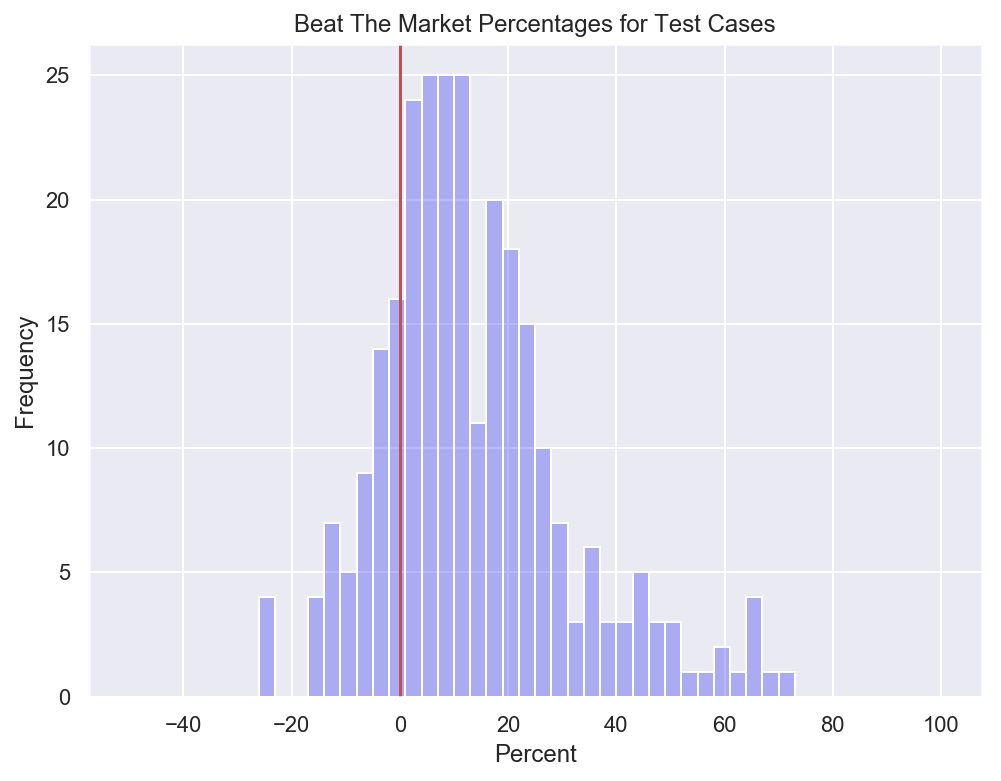

In [56]:
# Beat Percentage histogram
beats = df_srv[df_srv['beat']<125]['beat']
plt.figure(figsize=(8,6))
plt.axvline(x=0,color='r')
plt.xlabel("Percent")
plt.ylabel("Frequency")
plt.title("Beat The Market Percentages for Test Cases")
plt.hist(beats.dropna(),50,(-50,100), color = (.1,.1,.95,.3));

In [35]:
beats.describe()

count    276.000000
mean      13.571294
std       17.775258
min      -25.692415
25%        1.704957
50%       11.109944
75%       21.909387
max       71.089577
Name: beat, dtype: float64

The lower quartile is within 2% of even.  
This indicates that ~3/4 of the cases beat the market.  
On average, beating the market by 13% is expected.  
In the worst case, it was 26% draw down.  

#### Ticker Rank Sorting  
The idea here is that some stocks likely complement this trade approach better than others.  
We aim to do "Cherry Picking" on the "Cherry Picked", for improving out chances.  
We want "the best bang for the buck" so to speak.    

Sharpe ratios are used for this pursuit because they factor volatility risks.

In [36]:
df_srv = df_srv.sort_values(by=['sharpe'], ascending=False)
df_rnk = df_srv[df_srv['sharpe']<10].copy()
df_recent = df_rnk[df_rnk['test_year']>2017]
df_recent.head(30)

,symbol,equity,test_year,price,lowT,highT,trades,in_days,t-val,p-val,exp_ret,volatility,years,sharpe,beat
56,CNS,COHEN & STEERS INC,2019,61.827500,0.54375,0.60000,6,140,1.467486,0.144890,79.880909,0.159917,0.791781,6.089882,68.135581
230,HEI-A,HEICO CORP,2019,92.487500,0.28750,0.66250,2,135,2.482996,0.014357,80.029451,0.160943,0.791781,6.062729,66.826863
110,HEI-A,HEICO CORP,2019,92.487500,0.28750,0.66250,2,135,3.162604,0.001948,80.029451,0.160943,0.791781,6.062729,66.826863
71,AQN,ALGONQUIN POWER & UTIL CORP,2019,13.607500,0.24375,0.56875,7,163,-0.189557,0.850195,36.267091,0.074166,0.791781,5.704039,30.592375
125,LDOS,LEIDOS HOLDINGS INC,2019,81.465000,0.45000,0.48750,9,151,1.957585,0.053068,61.210207,0.132595,0.791781,5.566370,41.092032
17,WRB,BERKLEY (W R) CORP,2019,70.942500,0.26250,0.63750,6,138,1.953742,0.052984,43.985609,0.095099,0.791781,5.473549,21.641707
62,ALG,ALAMO GROUP INC,2019,119.085000,0.38125,0.74375,4,140,2.781986,0.006262,70.106986,0.156918,0.791781,5.419596,48.847878
80,AWR,AMERICAN STATES WATER CO,2019,94.430000,0.25000,0.68125,4,60,2.814471,0.005751,33.195760,0.071998,0.791781,5.336999,35.803703
11,FAF,FIRST AMERICAN FINANCIAL CP,2019,59.767500,0.28750,0.68125,9,93,2.678554,0.008066,38.019040,0.087826,0.791781,5.068789,21.378278
254,SPNS,SAPIENS INTERNATIONAL CORP,2019,19.797500,0.20000,0.73750,6,110,0.794228,0.428160,64.279345,0.166012,0.791781,4.679373,55.984562


Many of the top 30 entries from 2018 and 2019 exhibit (relatively) low p-values.  
Also it seems like 2019 is a good year for stock trading.  

#### Efficiency Frontier

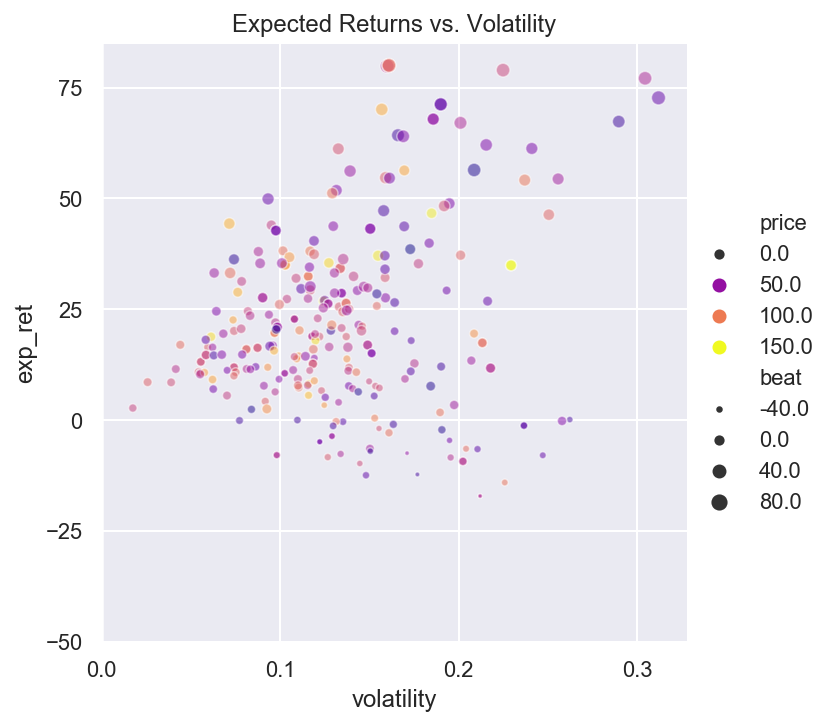

In [57]:
# Trade Efficiency Frontier
data_ef = df_rnk[((df_rnk['volatility']<1)&(df_rnk['exp_ret']<100))&(df_rnk['price']<150)]
plt.figure(figsize=(12, 8))
g = sb.relplot(x='volatility', y='exp_ret', 
               hue = 'price', size = 'beat', 
               sizes=(5, 50), alpha=.5, 
               palette="plasma", data = data_ef)
g.set(title = 'Expected Returns vs. Volatility')
g.set(yticks=np.arange(-50, 100, step=25))
g.set(xticks=np.arange(0, .4, step=0.1));

The most "efficient" portfolios utilize maximum returns at a given risk tolerance.  
These reside along the top edge of the scatterplot.  
These likewise embody the largest sharpe ratio's.   

#### Summary Survey Analysis  
The features from the market trade survey were reviewed.  
The market trade survey was based on use of the HSI indicator.  
These trades incorporated a hi-return classifier.  

The trading approach study in no way eliminates losing trades.  
On some occurances, the trade returns were found to be negative.  
On more occurances, they were found to be positive.  

### Disclaimer: this notebook is intended for educational purposes only and not recommended for real trading.